<a href="https://colab.research.google.com/github/Stanslusokurut/Sales-Prediction/blob/main/Project_2_Part_4_Stanslus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
filename = '/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/Food Security Nationals.xlsx'
#File has headers
df = pd.read_excel(filename)
df.head()

,a_date,a_state,a_county,a_payam,a_context,a_poptype,a_camp,a_camp_oth,a_activity,a_interview_mode,...,total_fexcari,fexcari,expgroup,stress,crisis,emergency,caricop,fcsgtoCarig,fs,_index
0,2022-06-09,Unity,Rubkona,Bentiu Town,Community village (host/IDPs),NaN,Bentiu town,NaN,GFD activities,NaN,...,68300.0,60.0,2,0,0,1,3.0,1,2.00,1
1,2022-06-09,Unity,Rubkona,Bentiu Town,Community village (host/IDPs),NaN,Bentiu town,NaN,GFD activities,NaN,...,26900.0,89.0,4,0,0,1,4.0,4,4.00,2
2,2022-06-09,Unity,Rubkona,Bentiu Town,Community village (host/IDPs),NaN,Rubkona town,NaN,GFD activities,NaN,...,53500.0,79.0,4,0,0,1,4.0,1,2.50,3
3,2022-06-09,Unity,Rubkona,Bentiu Town,Community village (host/IDPs),NaN,Bentiu town,NaN,GFD activities,NaN,...,31600.0,69.0,3,0,0,1,3.5,3,3.25,4
4,2022-06-10,Lakes,Awerial,Puluk,Community village (host/IDPs),NaN,Mingkaman,NaN,GFD activities,NaN,...,84000.0,43.0,1,0,0,0,1.0,4,2.50,5


In [101]:
#Set pandas to show all rows of results
pd.set_option('display.max_rows', None)

In [102]:
df.shape

(3186, 1454)

In [103]:
#Drop columns which have majority as null
df = df.loc[:, df.isnull().sum()/len(df)<0.50]

In [104]:
df.shape

(3186, 1062)

In [105]:
#REMOVE UNNECESARRY
#Keep only the relevant variables and Features based on literature review OF JOURNALS OF FOOD SECURITY 
# Family size, sex of HH head, level of education, age of the household head, number and types of communication media, income, numbers of livestock, cultivated land size, access to credit, flooding, conflict, 
#Received assistance, Food security group, land planted previous year, main source of livelihood, experience food shock, county, source of cereals, CARI Category

In [106]:
df = df[['a_county','respdnt_sex','respdnt_age','assist_received', 'head_marital','hh_size','totalhh','c_hh_ill','o_acc_med','c_house', \
         'farm_animal', 'meals_adults', 'sourceCER', 'mkt_distance', 'sers_1', 'cari' ]]
#Look at age of HH head, proportion eaten, cattle owned, gfarm area, comarea,

In [107]:
#Check duplicates
df.duplicated().sum()
#Drop duplicate
df = df.drop_duplicates()
df.duplicated().sum()

0

In [108]:
#Rename certain variable names  to clear names
df = df.rename(columns = {'a_county': 'Count Name','respdnt_sex': 'Respondent sex','respdnt_age': 'Respondent age','assist_received': 'Received WFP assistance', 'head_marital': 'Marital status',\
                          'hh_size': 'Household size','totalhh': 'Total HH Members','c_hh_ill': 'HH has chronically ill member','o_acc_med': 'Access to medicine & health','c_house': 'Type of house',\
                          'farm_animal': 'Has farm animals', 'meals_adults': 'Meals eaten by adults', 'sourceCER': 'Source Cereals', 'mkt_distance': 'Distance to markets',\
                         'sers_1' : 'Can bounce back', 'cari': 'Food security status'})



In [109]:
#Check data types
df.dtypes

Count Name                        object
Respondent sex                    object
Respondent age                     int64
Received WFP assistance           object
Marital status                    object
Household size                   float64
Total HH Members                 float64
HH has chronically ill member     object
Access to medicine & health       object
Type of house                     object
Has farm animals                  object
Meals eaten by adults            float64
Source Cereals                    object
Distance to markets              float64
Can bounce back                   object
Food security status              object
dtype: object

In [110]:
#Check and replace missing values
df.isnull().sum()

Count Name                         0
Respondent sex                     0
Respondent age                     0
Received WFP assistance            4
Marital status                    17
Household size                    17
Total HH Members                  17
HH has chronically ill member     17
Access to medicine & health       21
Type of house                     21
Has farm animals                  17
Meals eaten by adults             17
Source Cereals                    37
Distance to markets              240
Can bounce back                   17
Food security status               0
dtype: int64

In [111]:
#Few missing values. Replace the continpus variables and the categorical variables using 
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

In [112]:
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [113]:
#Obtain Categorical values from test data
cat_selector = make_column_selector(dtype_include='object')
df_cat  = df[cat_selector(df)]
df_cat.head()

,Count Name,Respondent sex,Received WFP assistance,Marital status,HH has chronically ill member,Access to medicine & health,Type of house,Has farm animals,Source Cereals,Can bounce back,Food security status
0,Rubkona,Female,Yes,Married/Partner,No,Yes,Straw hut,No,Market (Purchase cash or credit),Agree,Marginally food secure
1,Rubkona,Female,Yes,Widowed,No,Yes,Rakooba/Improvised Shelter,No,Support from neighbors/relatives,Agree,Severely food insecure
2,Rubkona,Female,Yes,Widowed,No,Yes,Rakooba/Improvised Shelter,No,Market (Purchase cash or credit),Agree,Moderately food insecure
3,Rubkona,Female,Yes,Divorced/Separated,No,Yes,Straw hut,No,Market (Purchase cash or credit),Agree,Moderately food insecure
4,Awerial,Male,Yes,Married/Partner,No,No,Rakooba/Improvised Shelter,Yes,Food assistance,Neutral,Moderately food insecure


In [114]:
#Extract Numeric Values 
cat_selector = make_column_selector(dtype_include='number')
df_num  = df[cat_selector(df)]
df_num .head()

,Respondent age,Household size,Total HH Members,Meals eaten by adults,Distance to markets
0,32,6.0,6.0,2.0,35.0
1,48,9.0,9.0,2.0,60.0
2,41,10.0,10.0,2.0,30.0
3,33,11.0,11.0,2.0,15.0
4,68,5.0,5.0,2.0,30.0


In [115]:
#REPLACE ANY MISSING VALUES 
#instantiate SimpleImputers with most_frequent and mean strategies
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [116]:
 #Impute for missing numeric variables 
df_num = pd.DataFrame(mean_imputer.fit_transform(df_num), columns = df_num.columns)
df_num.isnull().sum()

Respondent age           0
Household size           0
Total HH Members         0
Meals eaten by adults    0
Distance to markets      0
dtype: int64

In [117]:
 #Impute for missing Categorical variables 
df_cat = pd.DataFrame(freq_imputer.fit_transform(df_cat), columns = df_cat.columns)
df_cat.isnull().sum()

Count Name                       0
Respondent sex                   0
Received WFP assistance          0
Marital status                   0
HH has chronically ill member    0
Access to medicine & health      0
Type of house                    0
Has farm animals                 0
Source Cereals                   0
Can bounce back                  0
Food security status             0
dtype: int64

In [118]:
#Concatenate Numerical and Categorical data
# Combine the categorical and numerical dataframes
df = pd.concat([df_num, df_cat], axis=1)
df.head()

,Respondent age,Household size,Total HH Members,Meals eaten by adults,Distance to markets,Count Name,Respondent sex,Received WFP assistance,Marital status,HH has chronically ill member,Access to medicine & health,Type of house,Has farm animals,Source Cereals,Can bounce back,Food security status
0,32.0,6.0,6.0,2.0,35.0,Rubkona,Female,Yes,Married/Partner,No,Yes,Straw hut,No,Market (Purchase cash or credit),Agree,Marginally food secure
1,48.0,9.0,9.0,2.0,60.0,Rubkona,Female,Yes,Widowed,No,Yes,Rakooba/Improvised Shelter,No,Support from neighbors/relatives,Agree,Severely food insecure
2,41.0,10.0,10.0,2.0,30.0,Rubkona,Female,Yes,Widowed,No,Yes,Rakooba/Improvised Shelter,No,Market (Purchase cash or credit),Agree,Moderately food insecure
3,33.0,11.0,11.0,2.0,15.0,Rubkona,Female,Yes,Divorced/Separated,No,Yes,Straw hut,No,Market (Purchase cash or credit),Agree,Moderately food insecure
4,68.0,5.0,5.0,2.0,30.0,Awerial,Male,Yes,Married/Partner,No,No,Rakooba/Improvised Shelter,Yes,Food assistance,Neutral,Moderately food insecure


In [119]:
df.dtypes

Respondent age                   float64
Household size                   float64
Total HH Members                 float64
Meals eaten by adults            float64
Distance to markets              float64
Count Name                        object
Respondent sex                    object
Received WFP assistance           object
Marital status                    object
HH has chronically ill member     object
Access to medicine & health       object
Type of house                     object
Has farm animals                  object
Source Cereals                    object
Can bounce back                   object
Food security status              object
dtype: object

***PART 3 BEGINS FROM HERE***

In [120]:
#PREPROCESS THE DATA

In [121]:
df['Food security status'].value_counts()

Moderately food insecure    1695
Marginally food secure       832
Severely food insecure       501
Food secure                  157
Name: Food security status, dtype: int64

In [122]:
#
#Binarize the Target Vector
#Convert Target to Numeric Values
df['Food security status'] = df['Food security status'].replace({'Moderately food insecure':0,'Severely food insecure':0, 'Food secure':1, 'Marginally food secure':1})

In [123]:
df['Food security status'].value_counts()

0    2196
1     989
Name: Food security status, dtype: int64

In [124]:
#Load libraries 
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [125]:
df.dtypes

Respondent age                   float64
Household size                   float64
Total HH Members                 float64
Meals eaten by adults            float64
Distance to markets              float64
Count Name                        object
Respondent sex                    object
Received WFP assistance           object
Marital status                    object
HH has chronically ill member     object
Access to medicine & health       object
Type of house                     object
Has farm animals                  object
Source Cereals                    object
Can bounce back                   object
Food security status               int64
dtype: object

In [126]:
df.nunique()

Respondent age                   71
Household size                   21
Total HH Members                 21
Meals eaten by adults            11
Distance to markets              83
Count Name                       50
Respondent sex                    2
Received WFP assistance           2
Marital status                    4
HH has chronically ill member     2
Access to medicine & health       2
Type of house                    11
Has farm animals                  2
Source Cereals                    7
Can bounce back                   5
Food security status              2
dtype: int64

In [127]:
# Create X feature matrix and y target vector
y = df['Food security status']
X = df.drop(columns = ['Food security status', 'Source Cereals' ])

In [128]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [129]:
train_cols = X.columns

In [130]:
#Import further libraries
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder

In [131]:
cat_selector = make_column_selector(dtype_include='object')

In [132]:
cat_selector(df)

['Count Name',
 'Respondent sex',
 'Received WFP assistance',
 'Marital status',
 'HH has chronically ill member',
 'Access to medicine & health',
 'Type of house',
 'Has farm animals',
 'Source Cereals',
 'Can bounce back']

In [134]:
#Select only categrical data from the dataset
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data.head()

,Count Name,Respondent sex,Received WFP assistance,Marital status,HH has chronically ill member,Access to medicine & health,Type of house,Has farm animals,Can bounce back
2974,Maban,Female,Yes,Married/Partner,No,Yes,Rakooba/Improvised Shelter,No,Agree
1334,Mayom,Female,Yes,Married/Partner,Yes,Yes,Tukul,Yes,Disagree
392,Akobo,Female,Yes,Married/Partner,No,Yes,Tukul,Yes,Disagree
27,Guit,Female,Yes,Married/Partner,No,Yes,Rakooba/Improvised Shelter,No,Agree
2137,Wau,Male,Yes,Married/Partner,Yes,Yes,Semi/Concrete building,No,Agree


In [135]:
#Initiate the one hot encoder
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# We pass values to the above parameters to change the default behaviour of the encorder

In [136]:
#fit the OneHotEncoder on the training data
ohe_encoder.fit(train_cat_data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [137]:
#transform both the training and the testing data
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)

In [138]:
# View the result
test_ohe

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [139]:
#convert to dataframe, extract new column names from encoder
#set prefixes to original column names
ohe_column_names = ohe_encoder.get_feature_names_out(train_cat_data.columns)
# The above method will get geature names from the onehotencoded data

# Create a dataframe
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)

train_ohe.head()

,Count Name_Abiemnhom,Count Name_Abyei,Count Name_Akobo,Count Name_Aweil Centre,Count Name_Aweil East,Count Name_Aweil North,Count Name_Aweil South,Count Name_Aweil West,Count Name_Awerial,Count Name_Bor South,...,Type of house_Substandard shelter (factory/warehouse/garage/shop/worksite/unfinished building),Type of house_Tent,Type of house_Tukul,Has farm animals_No,Has farm animals_Yes,Can bounce back_Agree,Can bounce back_Disagree,Can bounce back_Neutral,Can bounce back_Strngly agree,Can bounce back_Strongly disagree
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [140]:
# create a numeric selector
num_selector = make_column_selector(dtype_include='number')

In [152]:
# Slice the numeric columns from the train and test set
train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)

In [153]:
#Scale the numeric variables before concatenation
from sklearn.preprocessing import StandardScaler
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.

train_nums = pd.DataFrame(scaler.fit_transform(train_nums),columns = train_nums.columns)
test_nums = pd.DataFrame(scaler.fit_transform(test_nums),columns = test_nums.columns)


In [165]:
#Concatenate Numerical and Categorical data
# Combine the categorical and numerical dataframes
X_train = pd.concat([train_nums, train_ohe], axis=1)
X_test = pd.concat([test_nums, test_ohe], axis=1)
X_train.head()
#This is the resulting Numpy Array after transformation of both categorical data to a sparse matrix and afterwards concatenatio

,Respondent age,Household size,Total HH Members,Meals eaten by adults,Distance to markets,Count Name_Abiemnhom,Count Name_Abyei,Count Name_Akobo,Count Name_Aweil Centre,Count Name_Aweil East,...,Type of house_Substandard shelter (factory/warehouse/garage/shop/worksite/unfinished building),Type of house_Tent,Type of house_Tukul,Has farm animals_No,Has farm animals_Yes,Can bounce back_Agree,Can bounce back_Disagree,Can bounce back_Neutral,Can bounce back_Strngly agree,Can bounce back_Strongly disagree
0,-0.877890,-1.274268,-1.274268,0.055344,-0.093814,-0.106938,-0.182535,-0.118375,-0.128852,-0.167275,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.716771,0.208517,0.208517,-0.056922,0.009357,-0.106938,-0.182535,-0.118375,-0.128852,-0.167275,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-1.361247,0.208517,0.208517,-0.056922,0.009357,-0.106938,-0.182535,8.447700,-0.128852,-0.167275,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.716771,-0.903572,-0.903572,-0.056922,-0.116741,-0.106938,-0.182535,-0.118375,-0.128852,-0.167275,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.700015,0.949910,0.949910,-0.169188,0.009357,-0.106938,-0.182535,-0.118375,-0.128852,-0.167275,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


**RUN A LOGISTIC REGRESSION MODEL TO PREDICT FOOD INSECURITY **

In [179]:
#Get Libraries
from sklearn.linear_model import LogisticRegression
#Instatiate the model
logreg = LogisticRegression()
#data is already scaled. No need for scaling

In [180]:
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
%%time
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.7395309882747069
0.7076537013801757
CPU times: user 103 ms, sys: 38.4 ms, total: 141 ms
Wall time: 79.2 ms


In [ ]:
#Accuracy of the model is 74% on training data and 71% on test data

{0.0001: 0.6737766624843162,
 0.001: 0.6737766624843162,
 0.01: 0.6775407779171895,
 0.1: 0.7063989962358845,
 1: 0.7063989962358845,
 10: 0.7089084065244667,
 100: 0.7114178168130489,
 1000: 0.7114178168130489}

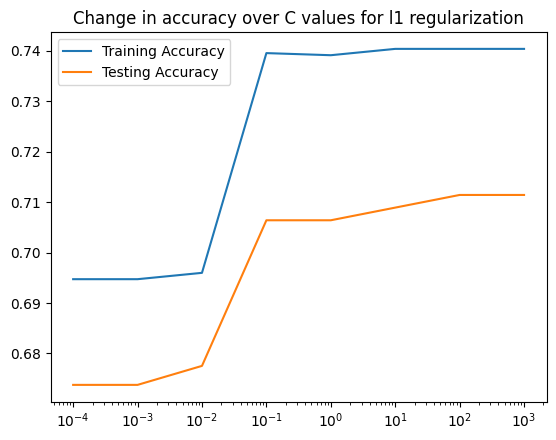

In [160]:
#L1 Fitting to the model
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg.score(X_train, y_train))
  test_scores.append(log_reg.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.6787954830614805,
 0.001: 0.7076537013801757,
 0.01: 0.7038895859473023,
 0.1: 0.7076537013801757,
 1: 0.7076537013801757,
 10: 0.7089084065244667,
 100: 0.7114178168130489,
 1000: 0.7114178168130489}

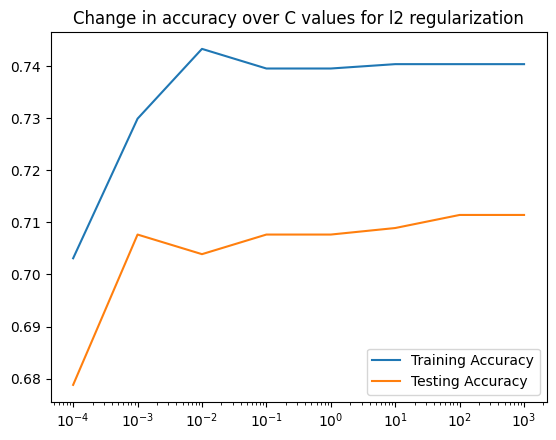

In [161]:
#LL2 TUNING
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg.score(X_train, y_train))
  test_scores.append(log_reg.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


In [ ]:
# Highest accuracy is obtained with a C score of 0.1 in the L1 fitted model

NEURAL NETWORKS MODEL

In [166]:
#Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers

In [168]:
# Instantiate Sequential model object
model = Sequential()
# get the input shape
input_shape = X_train.shape[1]
print(input_shape)

165


In [170]:
# First hidden layer
model.add(Dense(165, # Number of neurons = number of features 
                input_dim = input_shape, #Shape already defined in a previous function 
                activation = 'relu')) #use the relu activatio function
# Second hidden layer
model.add(Dense(40, # neurons in the second hidden layer
                activation = 'relu')) #activated using teh relu function

# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 165)               27390     
                                                                 
 dense_1 (Dense)             (None, 40)                6640      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
 dense_3 (Dense)             (None, 165)               330       
                                                                 
 dense_4 (Dense)             (None, 40)                6640      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 41,082
Trainable params: 41,082
Non-trai

In [171]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                                        epochs= 30,
                    validation_data=(X_test, y_test)
                    ) #Use 10 epochs to prevent overfitting of the model

Epoch 1/30
75/75 [==============================] - 2s 10ms/step - loss: 0.6249 - accuracy: 0.6880 - val_loss: 0.6124 - val_accuracy: 0.6738
Epoch 2/30
75/75 [==============================] - 0s 3ms/step - loss: 0.5633 - accuracy: 0.6947 - val_loss: 0.5945 - val_accuracy: 0.6738
Epoch 3/30
75/75 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7148 - val_loss: 0.5824 - val_accuracy: 0.7039
Epoch 4/30
75/75 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7605 - val_loss: 0.5898 - val_accuracy: 0.7039
Epoch 5/30
75/75 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7621 - val_loss: 0.6091 - val_accuracy: 0.7051
Epoch 6/30
75/75 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7873 - val_loss: 0.6235 - val_accuracy: 0.7014
Epoch 7/30
75/75 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8028 - val_loss: 0.6352 - val_accuracy: 0.7064
Epoch 8/30
75/75 [=

In [172]:
#Evaluate the model on Test Data
%%time
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 3ms/step - loss: 1.0137 - accuracy: 0.6763


[1.013708233833313, 0.6762861013412476]

2ND NEURAL NETWORKS MODEL

In [173]:
# First hidden layer
model.add(Dense(165, # Number of neurons = number of features 
                input_dim = input_shape, #Shape already defined in a previous function 
                activation = 'relu')) #use the relu activatio function
# Second hidden layer
model.add(Dense(100, # neurons in the second hidden layer
                activation = 'relu')) #activated using teh relu function
# Third hidden layer
model.add(Dense(40, # neurons in the second hidden layer
                activation = 'relu')) #activated using teh relu function
# Fourth hidden layer
model.add(Dense(5, # neurons in the second hidden layer
                activation = 'relu')) #activated using teh relu function

# Output layer
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['accuracy'])

In [175]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                                        epochs= 30,
                    validation_data=(X_test, y_test)
                    ) #Use 30 epochs 

Epoch 1/30
75/75 [==============================] - 3s 10ms/step - loss: 0.6049 - accuracy: 0.8798 - val_loss: 0.8314 - val_accuracy: 0.6675
Epoch 2/30
75/75 [==============================] - 0s 4ms/step - loss: 0.5579 - accuracy: 0.9062 - val_loss: 0.7432 - val_accuracy: 0.6851
Epoch 3/30
75/75 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.9028 - val_loss: 0.7301 - val_accuracy: 0.6838
Epoch 4/30
75/75 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.9024 - val_loss: 0.7273 - val_accuracy: 0.6989
Epoch 5/30
75/75 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.8991 - val_loss: 0.7554 - val_accuracy: 0.6763
Epoch 6/30
75/75 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.9008 - val_loss: 0.7467 - val_accuracy: 0.6788
Epoch 7/30
75/75 [==============================] - 0s 4ms/step - loss: 0.4720 - accuracy: 0.9041 - val_loss: 0.8176 - val_accuracy: 0.6550
Epoch 8/30
75/75 [=

In [178]:
#Evaluate the model on Test Data
%%time
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 2ms/step - loss: 0.9003 - accuracy: 0.6437
CPU times: user 396 ms, sys: 1.96 ms, total: 398 ms
Wall time: 413 ms


[0.9002935290336609, 0.643663763999939]

KNN NEAREST NEIGHBOURES MODEL

In [182]:
#Define scaler & Run with 1 Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
predictions
acc_score = knn.score(X_test, y_test)
acc_score

0.644918444165621

In [188]:
#Define scaler & Run with 1 Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
predictions
acc_score = knn.score(X_test, y_test)
acc_score

0.6913425345043914

In [189]:
#Define scaler & Run with 1 Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
predictions
acc_score = knn.score(X_test, y_test)
acc_score

0.7063989962358845

In [ ]:
#Get the best parameters using GRID SEARCH

In [184]:
knn_pipe = KNeighborsClassifier()
knn_pipe.get_params()
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,30),
              'kneighborsclassifier__p': range(1,30),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [ ]:
#Grid serch runs very low and is terminated 

**The logistics regression model is the best model and is suggested to adopt to run the same due to accuracy and time. It performs better than the neural netwworks and KNN even without refining or firn tuning. The Same is suggested to be put to production but with continued improvement from its 70% accuracy to higher accuracy levels. The training dataset can also be altered to include other variables that can help enhance learning of the model for improved predictions**